# The Sparks Foundation   

# Data Science and Business Analytics Intern 
#GRIPJULY22                                                                                                                     
Name : Sejal Vithoba Naik                                                                                                       
Task 1 : Prediction Using Supervised ML   
PROBLEM:

1)Predict the percentage of the student based on the study hour.

2)What will be predicted score if a student studies for 9.5hrs/day?

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [2]:
data=pd.read_csv("http://bit.ly/w-data")

In [3]:
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# Exploring Data

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Plotting Hours Vs Scores Graph

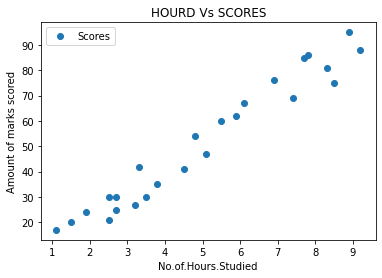

In [9]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('HOURD Vs SCORES')
plt.xlabel('No.of.Hours.Studied')
plt.ylabel('Amount of marks scored')
plt.show()

# From the above graph we can clearly make out that there is a positive linear relation between amount of marks scored and no of hours studied

# Splitting the data

In [10]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

# Train the Model

In [12]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

print('Training Complete')

print(regressor.intercept_)

print(regressor.coef_)

Training Complete
2.0181600414346974
[9.91065648]


# Plotting the Regression line


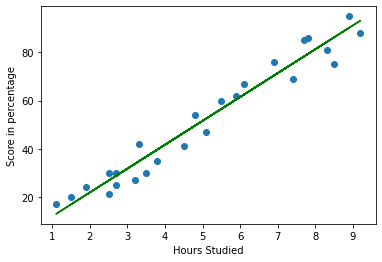

In [13]:
line=regressor.coef_*x + regressor.intercept_
plt.scatter(x,y)
plt.plot(x ,line, c="g")
plt.xlabel("Hours Studied")
plt.ylabel("Score in percentage")
plt.show()


# Lets Make some predictions

In [14]:
print(x_test)
y_pred=regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
data2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [16]:
print(data2)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


# Evaluating mean absolute error

In [17]:
from sklearn import metrics
print('Mean Aboslute Error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean Aboslute Error:  4.183859899002975


# Predicting the score if a student studies for 9.25 hours a day.

In [18]:
hours=np.array([[9.25]])
own_pred=regressor.predict(hours)
print("No of Hours studied {}".format(hours))
print("Marks Predicted {}".format(own_pred[0]))

No of Hours studied [[9.25]]
Marks Predicted 93.69173248737535


# Therefore, the predicted score of a student who studies for 9.25 hours/day is 93.691